## Projeto Analysis of Diabetes Risk Factor

### Machine Learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Carregando o Dataset pré-processado

In [554]:
df_diabetes_indcators = pd.read_csv("..\\datalake\\processing\\diabetes_indcators.csv", index_col=0)

In [555]:
df_diabetes_indcators.head()

,high_blood_preassure,high_cholesterol,body_mass_index,age,physical_activity_in_past_30_days,physical_illness_injury_days,education,income,serious_difficulty_walking,heart_diseaseor_attack,days_of_poor_mental_health,general_health_scale,avc,cholesterol_check,smoker,at_least_one_veggies_a_day,high_consumption_of_alcohol,diabetes
0,1,1,40.0,9,0,15,4,3,1,0,18,5,0,1,1,1,0,0
1,0,0,25.0,7,1,0,6,1,0,0,0,3,0,0,1,0,0,0
2,1,1,28.0,9,0,30,4,8,1,0,30,5,0,1,0,0,0,0
3,1,0,27.0,11,1,0,3,6,0,0,0,2,0,1,0,1,0,0
4,1,1,24.0,11,1,0,5,4,0,0,3,2,0,1,0,1,0,0


### Transformação de Features

In [556]:
def map_imc_ranges(x):
    if x <= 18.49:
        return 'under_weight'
    elif x >= 18.50 and x <=24.99:
        return 'normal_weight'
    elif x >= 25 and x <=29.99:
        return 'overweight'
    elif x >= 30 and x <=34.99:
        return 'obesity_I'
    elif x >= 35 and x <=39.99:
        return 'obesity_II'
    elif x >= 40:
        return 'obesity_III'
    else:
        return 'NaN'

In [557]:
df_diabetes_indcators['body_mass_index'] = df_diabetes_indcators['body_mass_index'].map(lambda x:map_imc_ranges(x))

In [558]:
def map_age_ranges(x):
    switcher = {
        1: "below_30",
        2: "below_30",
        3: "30_39",
        4: "30_39",
        5: "40_49",
        6: "40_49",
        7: "50_59",
        8: "50_59",
        9: "60_69",
        10: "60_69",
        11: "above_70",
        12: "above_70",
        13: "above_70"
    }
    return switcher.get(x, 0)

In [559]:
df_diabetes_indcators['age'] = df_diabetes_indcators['age'].map(lambda x:map_age_ranges(x))

In [560]:
def map_physical_mental_health_days(x):
    if x == 0:
        return 'zero'
    elif x >= 1 and x <=7:
        return '1_7'
    elif x >= 8 and x <=13:
        return '8_13'
    elif x >= 14 and x <=21:
        return '14_21'
    elif x >= 22 and x <=30:
        return '22_30'
    else:
        return 'NaN'

In [561]:
df_diabetes_indcators['physical_illness_injury_days'] = df_diabetes_indcators['physical_illness_injury_days']\
    .map(lambda x:map_physical_mental_health_days(x))

In [562]:
def map_income_scale(x):
    switcher = {
        1: '1',
        2: '1',
        3: '2',
        4: '2',
        5: '3',
        6: '3',
        7: '4',
        8: '4'
    }
    return switcher.get(x, 0)

In [563]:
df_diabetes_indcators['income'] = df_diabetes_indcators['income'].map(lambda x:map_income_scale(x))

In [564]:
def map_health_scale(x):
    switcher = {
        1: '1',
        2: '1',
        3: '2',
        4: '3',
        5: '3'
    }
    return switcher.get(x, 0)

In [565]:
df_diabetes_indcators['general_health_scale'] = df_diabetes_indcators['general_health_scale']\
    .map(lambda x:map_health_scale(x))

In [566]:
df_diabetes_indcators.head()

,high_blood_preassure,high_cholesterol,body_mass_index,age,physical_activity_in_past_30_days,physical_illness_injury_days,education,income,serious_difficulty_walking,heart_diseaseor_attack,days_of_poor_mental_health,general_health_scale,avc,cholesterol_check,smoker,at_least_one_veggies_a_day,high_consumption_of_alcohol,diabetes
0,1,1,obesity_III,60_69,0,14_21,4,2,1,0,18,3,0,1,1,1,0,0
1,0,0,overweight,50_59,1,zero,6,1,0,0,0,2,0,0,1,0,0,0
2,1,1,overweight,60_69,0,22_30,4,4,1,0,30,3,0,1,0,0,0,0
3,1,0,overweight,above_70,1,zero,3,3,0,0,0,1,0,1,0,1,0,0
4,1,1,normal_weight,above_70,1,zero,5,2,0,0,3,1,0,1,0,1,0,0


### Dummy das variáveis categóricas

In [567]:
df_diabetes_indcators = df_diabetes_indcators.drop(['education', 'days_of_poor_mental_health', 'cholesterol_check',
                                                    'at_least_one_veggies_a_day'], axis = 1)

In [568]:
variables_cat = ['income', 'age', 'general_health_scale',
                 'physical_illness_injury_days','body_mass_index']
df_diabetes_dummy = pd.get_dummies(df_diabetes_indcators, columns = variables_cat)

In [569]:
df_diabetes_dummy.head()

,high_blood_preassure,high_cholesterol,physical_activity_in_past_30_days,serious_difficulty_walking,heart_diseaseor_attack,avc,smoker,high_consumption_of_alcohol,diabetes,income_1,...,physical_illness_injury_days_1_7,physical_illness_injury_days_22_30,physical_illness_injury_days_8_13,physical_illness_injury_days_zero,body_mass_index_normal_weight,body_mass_index_obesity_I,body_mass_index_obesity_II,body_mass_index_obesity_III,body_mass_index_overweight,body_mass_index_under_weight
0,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [570]:
from sklearn.ensemble import RandomForestClassifier 

In [571]:
X = df_diabetes_dummy.drop(['diabetes'], axis = 1)
y = df_diabetes_dummy['diabetes']

base_model = RandomForestClassifier(max_depth = 9) 
base_model.fit(X, y) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [572]:
variables = pd.DataFrame()
variables['variable'] = X.columns
variables['importance'] = base_model.feature_importances_

In [573]:
variables.sort_values(by = 'importance', ascending = False)

,variable,importance
0,high_blood_preassure,0.224175
18,general_health_scale_1,0.135018
20,general_health_scale_3,0.130131
1,high_cholesterol,0.095444
3,serious_difficulty_walking,0.064552
26,body_mass_index_normal_weight,0.050062
4,heart_diseaseor_attack,0.048290
29,body_mass_index_obesity_III,0.036481
19,general_health_scale_2,0.033527
28,body_mass_index_obesity_II,0.024180


<AxesSubplot:ylabel='variable'>

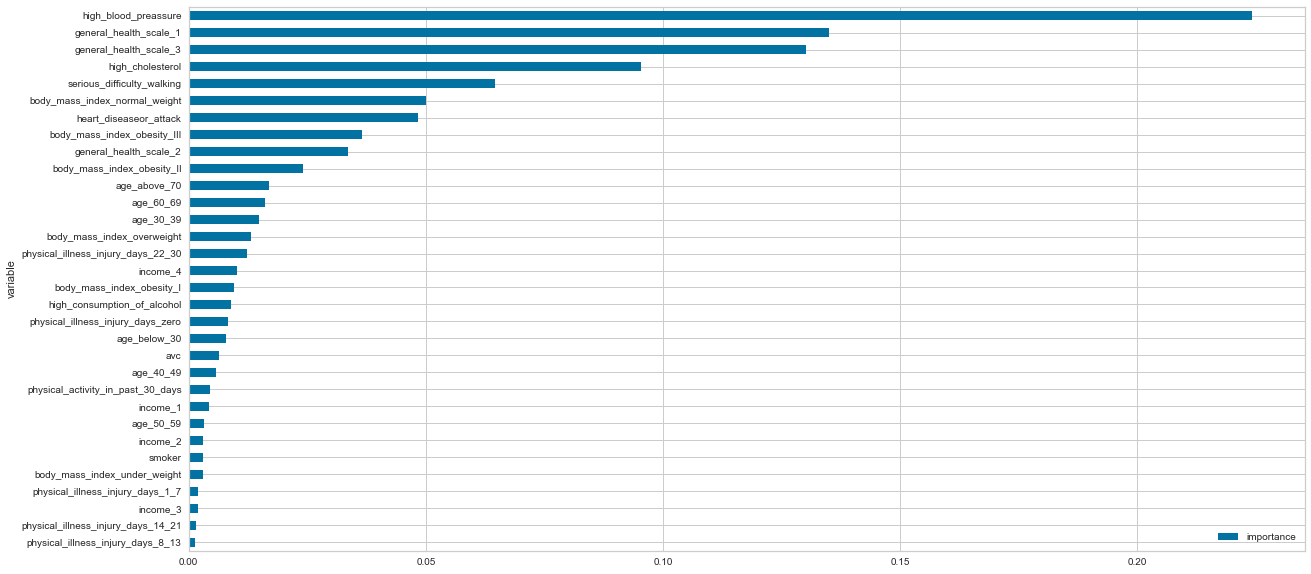

In [574]:
variables.sort_values(by = 'importance', ascending = True, inplace = True)
variables.set_index('variable', inplace = True)
variables.plot(kind='barh', figsize=(20, 10))

#### Filtrando apenas os atributos relevantes.

In [546]:
X = df_diabetes_dummy.drop(["diabetes"], axis=1)
y = df_diabetes_dummy['diabetes']

#### Realizando balanceamento de classes.

In [547]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [548]:
nm = NearMiss(sampling_strategy=0.40)

In [549]:
x_nm, y_nm = nm.fit_resample(X, y)

In [550]:
smote = SMOTE(sampling_strategy=0.60, random_state=33)

In [551]:
x_smote, y_smote = smote.fit_resample(x_nm, y_nm)

#### Separando os conjuntos de dados.

In [53]:
y_smote.value_counts()

0    87742
1    52645
Name: diabetes, dtype: int64

In [29]:
scaler = MinMaxScaler()

In [125]:
X = scaler.fit_transform(x_smote)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y_smote
       ,test_size = 0.2
       ,random_state = 123
)

#### Função do modelo de base.

In [127]:
def base_rate_model(X) :
    return np.zeros(X.shape[0])

#### Importando métodos de métrica de avaliação.

In [128]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [129]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

#### Análise do modelo de baseline

In [130]:
y_predict = base_rate_model(X_test)

In [131]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.62      1.00      0.77     17507
           1       0.00      0.00      0.00     10571

    accuracy                           0.62     28078
   macro avg       0.31      0.50      0.38     28078
weighted avg       0.39      0.62      0.48     28078



C:\Users\Joaquim Aniceto\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modelo de Árvore de Decisão

#### Instânciando o algoritmo.

In [132]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

#### Realizando o treinamento.

In [133]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Calculando as predições.

In [134]:
y_predict = decision_tree.predict(X_test)

#### Avaliando o resultado.

In [135]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.6933812498758216

              precision    recall  f1-score   support

           0       0.75      0.89      0.81     17507
           1       0.73      0.50      0.59     10571

    accuracy                           0.74     28078
   macro avg       0.74      0.69      0.70     28078
weighted avg       0.74      0.74      0.73     28078



### Modelo de Arvore Aleatória (Random Forest)

#### Instânciando o algoritmo.

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
random_forest = RandomForestClassifier()

#### Realizando o treinamento.

In [138]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

#### Calculando as predições.

In [139]:
y_predict = random_forest.predict(X_test)

#### Avaliando o resultado.

In [140]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 0.7212843419195425

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     17507
           1       0.72      0.57      0.64     10571

    accuracy                           0.76     28078
   macro avg       0.75      0.72      0.73     28078
weighted avg       0.75      0.76      0.75     28078



### Pycaret

In [ ]:
pip install pycaret

#### Importando os métodos.

In [46]:
from pycaret.classification import *

#### Definindo o Setup.

In [552]:
x_smote['diabetes']=y_smote
defined_setup = setup(x_smote
          ,target = "diabetes"
          ,normalize = False
          ,categorical_features=list(X.columns)
          #,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True,
          fix_imbalance_method = SMOTE(sampling_strategy=0.8),
          feature_selection = True,
          #feature_selection_threshold = 0.9
         )


,Description,Value
0,session_id,8551
1,Target,diabetes
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(140387, 31)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


#### Comparando diferentes modelos.

In [331]:
best_model = compare_models(fold = 5,sort = 'AUC', include = ['lightgbm', 'xgboost'], probability_threshold = 0.45)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8010,0.8767,0.7481,0.7285,0.7381,0.5777,0.5778,19.0840
lightgbm,Light Gradient Boosting Machine,0.7981,0.8750,0.7571,0.7193,0.7377,0.5737,0.5742,16.8160


#### Criando o modelo.

In [161]:
light_gbm = create_model('lightgbm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7562,0.8295,0.7075,0.6643,0.6852,0.4866,0.4873
1,0.7530,0.8262,0.6991,0.6614,0.6797,0.4789,0.4794
2,0.7524,0.8253,0.7069,0.6582,0.6817,0.4795,0.4803
3,0.7521,0.8268,0.6958,0.6609,0.6779,0.4766,0.4770
4,0.7534,0.8270,0.6972,0.6628,0.6796,0.4794,0.4798
Mean,0.7534,0.8269,0.7013,0.6615,0.6808,0.4802,0.4808
SD,0.0015,0.0014,0.0049,0.0021,0.0025,0.0034,0.0034


#### Realizando o tunning do modelo.

In [193]:
tuned_light_gbm = tune_model(light_gbm,
                             fold = 5,
                             custom_grid = {
                                          "learning_rate":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
                                         ,"n_estimators":[x for x in range(100, 1100, 100)]
                                         ,"num_leaves":[2, 4, 8]
                                         ,"max_depth":[2, 4, 8, 16]
                                         },
                             optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7579,0.8302,0.7011,0.6690,0.6847,0.4883,0.4887
1,0.7553,0.8280,0.6900,0.6682,0.6789,0.4813,0.4814
2,0.7543,0.8257,0.6923,0.6658,0.6788,0.4800,0.4802
3,0.7545,0.8275,0.6875,0.6677,0.6775,0.4794,0.4795
4,0.7558,0.8279,0.6899,0.6692,0.6794,0.4822,0.4824
Mean,0.7555,0.8279,0.6921,0.6680,0.6798,0.4822,0.4824
SD,0.0013,0.0014,0.0047,0.0012,0.0025,0.0032,0.0033


#### Finalizando o modelo.

In [194]:
final_model = finalize_model(tuned_light_gbm)

In [198]:
save_model(final_model,'..\\datalake\\curated\\model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='diabetes',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=8,
                                 min_child_samples=20, 

#### Transferindo os arquivos para o Data Lake.

In [197]:
x_smote.to_csv("..\\datalake\\curated\\dataset.csv", index=False)